<a href="https://colab.research.google.com/github/psuarezserrato/TutorialComputationalPoissonGeometry/blob/main/Tutorial_Computational_Poisson_Geometry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Installation

To install our Poisson Geometry modules, we can use `pip` 

In [ ]:
!pip install poissongeometry

In [ ]:
!pip install numericalpoissongeometry

The source code of our modules can be accessed at the following references [PoissonGeometry](https://github.com/appliedgeometry/poissongeometry) y [NumericalPoissonGeometry](https://github.com/appliedgeometry/NumericalPoissonGeometry).     

### Syntax

* A scalar function in `PoissonGeometry` is written using *string expressions.

    For example, the function $f:\mathbf{R}^{3} \to \mathbf{R}$,
    
    $$f(x_1,x_2,x_3) = ax_1^2 + bx_2^2 + cx_3^2, \quad a,b,c \in \mathbf{R}$$
    
    must be written in the following way:
```
"a*x1**2 + b*x2**2 + c*x3**2"
```
Here, `x1, x2, x3` are symbolic variables that `PoissonGeometry` defines by default and that in this case represent the coordinates  $(x_1,x_2,x_3)$.

    * Note: All characters that are not local coordinates are treated as (symbolic) parameters. For example `a`, `b`, `c` in the above expression.

    * Recall that Python supports the following basic operations:

| Expression | Description  || Expression | Description    |
| :--------: | ------------ || :--------: | -------------- |
| +          | Addition     || *          | Multiplication |
| -          | Subtractio   || **         | Powers |
| /          | Division     ||

* A multivector field or a differential form in `Poisson Geometry` is written using *dictionaries* with *tuples of integers* as **keys** and *string expressions* as **values**. 

    For example, in $\mathbf{R}^{3}$: 
    * The vector field $x_1\frac{\partial}{\partial x_1} + x_2\frac{\partial}{\partial x_2} + x_3 \frac{\partial}{\partial x_3}$ must be written as \\
```{(1,):'x1', (2,):'x2', (3,):'x3'}```

    * The bivector field $x_1\frac{\partial}{\partial x_1}\wedge \frac{\partial}{\partial x_2} - x_2\frac{\partial}{\partial x_1}\wedge \frac{\partial}{\partial x_3} + x_3 \frac{\partial}{\partial x_2}\wedge \frac{\partial}{\partial x_3}$ must be written as \\
```{(1,2):'x1', (1,3):'-x2', (2,3):'x3'}```

    * The multivector 3-field $x_1\frac{\partial}{\partial x_1}\wedge \frac{\partial}{\partial x_2}\wedge \frac{\partial}{\partial x_3}$ must be written as \\
```{(1,2,3):'x1'}```

**Observations:**
1. In `Python`, a variable \\
```{key_1: value_1, ..., key_n: value_n}``` \\
is called a 'dictionay'. Each `key_1,...,key_n` is called a *key* of the dictionary and each `value_1,...,value_n` is the *value* of the corresponding key.

2. In our case, each key is a variable of type `tuple` and each value is a variable of type `string'. 

    If we have a multivector $A$ of degree $a$ in $\mathbf{R}^{m}$ $$A = \sum_{1 \leq i_1 < i_2 < \cdots < i_a \leq m} A^{i_1 i_2 \cdots i_a}\,\frac{\partial}{\partial{x_{i_1}}} \wedge \frac{\partial}{\partial{x_{i_2}}} \wedge \cdots \wedge \frac{\partial}{\partial{x_{i_a}}},$$ \\

     the dictionary keys must be tuples $(i_1,i_2,\ldots,i_a)$ corresponding to the ordered indices $i_1 i_2 \cdots i_a$ of $A^{i_1 i_2 \cdots i_a}$ and the values the corresponding string expression of the coefficient (scalar function) $A^{i_1 i_2 \cdots i_a}$.
     
     

    * We can write only the keys and values of the *non-zero* coefficients.

3. We can change the order of the indices in each tuple by adding the minus sign on the corresponding value. 

    For example,
    
    * The bivector field $x_1\frac{\partial}{\partial x_1}\wedge \frac{\partial}{\partial x_2}$ can be written \\
    ```{(1,2): 'x1'}``` \\
or as \\
    ```{(2,1): '-x1'}```    
 where this last dictionary corresponds to the bivectorial field $-x_1\frac{\partial}{\partial x_2}\wedge\frac{\partial}{\partial x_1}$.


     **Note Although we have the option to ignore the order of the indices, we recommend keeping the order if possible. This way we avoid possible calculation errors and help simplify the final expressions.


4. The syntax for differential forms is the same as for multivector fields.

    For example, the 2-differential form in $\mathbf{R}^4$
    
    $$-\mathrm{d}x_{1} \wedge \mathrm{d}x_{2} - (x_1 + x_4) \mathrm{d}x_{3} \wedge \mathrm{d}x_{4}$$ 
    
    can be written as \\
```{(1,2):'-1', (3,4): '-(x1 + x4)'}```

5. Finally, in `PoissonGeometry` the following notation is used:
    * `Dxi` is equivalent to $\frac{\partial}{\partial x_{i}}$. 
    * `dxi` is equivalent to $\mathrm{d}x_{i}$.

 This happens because in `SymPy` it's not possible to define variables $\frac{\partial}{\partial x_{i}}$ or $\mathrm{d}x_{i}$.

    
        

   

### Examples

In [ ]:

# We import the PoissonGeometry using the alias pg
from poisson.poisson import PoissonGeometry as pg

# Define an instance of the module, to work in dimension 2 with the symbolic variable x (by default)
pg2 = pg(2)

# Import the NumPoissonGeometry module using the alias npg
from numpoisson.numpoisson import NumPoissonGeometry as npg

# Define an instance of the module, to work in dimension 2 with the symbolic variable x (by default)
npg2 = npg(2, variable="x")

# Vector Fields

We define the following vector field

$$\pi = (x_{1} + x_{2})\frac{\partial}{\partial x_{1}}\wedge\frac{\partial}{\partial x_{2}}$$
written in our syntax as: 

In [ ]:
pi = {(1, 2): 'x1 + x2'}

# Differential Forms

Consider the symplectic form on $R^{2}$
$$\omega = dx_{1}\wedge dx_{2}$$ 
written in our syntax as:

In [ ]:
omega = {(1, 2): '1'}

# Creation of Point Clouds for Evaluation

We create point clouds, on which we evaluate our functions, using `numpy` arrays:

In [ ]:
import numpy
# Where 10**4 is the number of points and 2 is the norm of the points 

M = numpy.random.rand(10**4, 2)
# M = numpy.random.randint(3, size=(10**3, 2))

# To show the point cloud as an array just do
M

array([[0.2754585 , 0.40175582],
       [0.05785217, 0.93165851],
       [0.32893522, 0.34710871],
       ...,
       [0.39821201, 0.60996996],
       [0.993163  , 0.20109544],
       [0.19863861, 0.05636937]])

## Evaluating M on a bivector

To evaluate the bivector $\pi$ on $M$ do (the result is `numpy` array by default)

In [ ]:
npg2.num_bivector(pi, M)

array([[[ 0.        ,  0.67721433],
        [-0.67721433,  0.        ]],

       [[ 0.        ,  0.98951068],
        [-0.98951068,  0.        ]],

       [[ 0.        ,  0.67604393],
        [-0.67604393,  0.        ]],

       ...,

       [[ 0.        ,  1.00818197],
        [-1.00818197,  0.        ]],

       [[ 0.        ,  1.19425844],
        [-1.19425844,  0.        ]],

       [[ 0.        ,  0.25500798],
        [-0.25500798,  0.        ]]])

To obtain a `pytorch` output do:

In [ ]:
npg2.num_bivector(pi, M, torch_output=True)

tensor([[[ 0.0000,  0.6772],
         [-0.6772,  0.0000]],

        [[ 0.0000,  0.9895],
         [-0.9895,  0.0000]],

        [[ 0.0000,  0.6760],
         [-0.6760,  0.0000]],

        ...,

        [[ 0.0000,  1.0082],
         [-1.0082,  0.0000]],

        [[ 0.0000,  1.1943],
         [-1.1943,  0.0000]],

        [[ 0.0000,  0.2550],
         [-0.2550,  0.0000]]], dtype=torch.float64)

To obtain  a `tensorflow` output do:

In [ ]:
npg2.num_bivector(pi, M, tf_output=True)

<tf.Tensor: shape=(10000, 2, 2), dtype=float64, numpy=
array([[[ 0.        ,  0.67721433],
        [-0.67721433,  0.        ]],

       [[ 0.        ,  0.98951068],
        [-0.98951068,  0.        ]],

       [[ 0.        ,  0.67604393],
        [-0.67604393,  0.        ]],

       ...,

       [[ 0.        ,  1.00818197],
        [-1.00818197,  0.        ]],

       [[ 0.        ,  1.19425844],
        [-1.19425844,  0.        ]],

       [[ 0.        ,  0.25500798],
        [-0.25500798,  0.        ]]])>

When possible we can also obtain the bivector in a dictionary format inside a  `numpy`  array

In [ ]:
npg2.num_bivector(pi, M, dict_output=True)

array([{(1, 2): 0.6772143265027499}, {(1, 2): 0.9895106842474789},
       {(1, 2): 0.6760439339132539}, ..., {(1, 2): 1.0081819697856078},
       {(1, 2): 1.194258437446489}, {(1, 2): 0.2550079813181265}],
      dtype=object)

Verify that $\pi$ is a Poisson bivector using:  

In [ ]:
pg2.is_poisson_bivector(pi)

True

Consider the following functions 

$f=x_{1}^{2} + x_{2}^{2}\,$,  

$\, g=x_{1} + x_{2}$

In [ ]:
# Las funciones f,g se escriben en la sintaxis de Python
f = "x1**2+x2**2" 
g = "x1+x2"

We can compute the Poisosn bracket  $\{f, g\}_{\pi}$ as follows:

In [ ]:
pg2.poisson_bracket(pi, f, g)

'-2*x1*(-x1 - x2) - 2*x2*(x1 + x2)'

We can also obtain the result in $\LaTeX{}$ format, to include it in a manuscript

In [ ]:
pg2.poisson_bracket(pi, f, g, latex=True)

'- 2 x_{1} \\left(- x_{1} - x_{2}\\right) - 2 x_{2} \\left(x_{1} + x_{2}\\right)'

To compute the Hamiltonian vector field $X_{f}$ with respect to $\pi$ do:

In [ ]:
X_f = pg2.hamiltonian_vf(pi, f)
X_f

{(1,): '-2*x2*(x1 + x2)', (2,): '-2*x1*(-x1 - x2)'}

To get it in $\LaTeX{}$

In [ ]:
pg2.hamiltonian_vf(pi, f, latex=True)

'\\left\\{ \\left( 1,\\right) : - 2 x_{2} \\left(x_{1} + x_{2}\\right), \\  \\left( 2,\\right) : - 2 x_{1} \\left(- x_{1} - x_{2}\\right)\\right\\}'

From the previous result we see that the field $X_{f}$ has the expression:

$$X_{f} = - 2 x_{2} \left(x_{1} + x_{2}\right)\frac{\partial}{\partial x_{1}} - 2 x_{1} \left(- x_{1} - x_{2}\right)\frac{\partial}{\partial x_{2}}.$$

Our syntax using dictionaries is of the form, 

$$X_{f} = \left\{\left( 1,\right) : - 2 x_{2} \left(x_{1} + x_{2}\right), \  \left( 2,\right) : - 2 x_{1} \left(- x_{1} - x_{2}\right)\right\}.$$ 

We can evaluate $X_{f}$ on $M$ with:

In [ ]:
X_f_eval = npg2.num_hamiltonian_vf(pi, f, M)
X_f_eval

array([[[-0.5441496 ],
        [ 0.37308889]],

       [[-1.8437721 ],
        [ 0.11449069]],

       [[-0.46932148],
        [ 0.44474932]],

       ...,

       [[-1.22992143],
        [ 0.80294034]],

       [[-0.48031986],
        [ 2.37218658]],

       [[-0.02874928],
        [ 0.10130886]]])

# Plotting the vector field $X_{f}$. 

2D example with `matplotlib`.

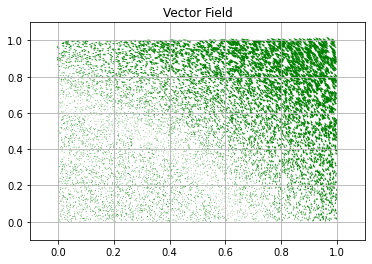

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

# We select only the first 100 entries of the matrix  
#_M = M[:100]  
#_X_f_eval = X_f_eval[:100]
x, y = M[:,0], M[:,1]
u = numpy.array([i[0] for i in X_f_eval[:,0]])
v = numpy.array([i[0] for i in X_f_eval[:,1]])
  
plt.quiver(x, y, u, v, color='g') 
plt.title('Vector Field') 
  
plt.xlim(-0.1, 1.1) 
plt.ylim(-0.1, 1.1) 
  
plt.grid() 
plt.show()

3D example with `plotly`

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# We define the values for the x- and y-parts 
x, y = M[:,0], M[:,1]
u = numpy.array([i[0] for i in X_f_eval[:,0]])
v = numpy.array([i[0] for i in X_f_eval[:,1]])
# We add the zero-valued arrays for the z-part because the vectrial field lives in R^{2}
z = numpy.zeros(shape=x.shape)
w = numpy.zeros(shape=u.shape)

fig = go.Figure(
    data=go.Cone(
      x = x.tolist(),
      y = y.tolist(),
      z = z.tolist(),
      u = u.tolist(),
      v = v.tolist(),
      w = w.tolist(),
      # You can change the color scale see the following link 
      # https://plotly.com/python/builtin-colorscales/
      colorscale='GnBu',
      sizemode="absolute",
      sizeref=5, # size of the cones
      anchor="tip"
    )
)

fig.update_layout(
    # To see all available templates go to
    # https://plotly.com/python/templates/
    template = "plotly_dark",
    title = "Graph of the vector field X_f_eval",
    height = 1000, # this size is in pixels (px)
)
fig.show()

## **Modulares Fields**

Let $P$ be a Poisson manifold with a Poisson tensor $\pi$, choose a smooth positive density $\mu$ on $P$.  To this data we associate the operator
$\phi _{mu }:f\mapsto {\rm div}_{mu }H_{f}$. 


Here $H_{f}$ is the Hamiltonian vector field of $f$, and ${\rm div}_{mu }\xi $ is the divergence of a vector field $\xi $. (${\cal L}_{\xi }$ is the Lie derivative wrt to  $ \xi $). 

 
 Even though $\phi$ looks like a second order operator 
 (a type of Laplacian), the antisymmetry of the Poisson tensor shows that $\phi _{\mu }$ is a derivation, and therefore it is a vector field. 

 It is called the **modular vector field** of $(P,\pi)$ with respect to the density $\mu$.


A detailed computation shows that 

${\cal L}_{\phi_{\mu}}\mu $

and

${\cal L}_{\phi_{\mu}}\pi $ 

both vanish.


The modular vector field $\phi _{\mu}$ is zero precisely when ${\mu}$ is an invariant density for the fluxes of all Hamiltonian vector fields.  

In this case, it suffices to refer to $\mu$ as an **invariant density** for the Poisson manifold, and we say that the Poisson manifold is **unimodular**.

If we substitute $a$ for $a$, where $a$ is a positive function, the modular vector field becomes $a$.
positive function, the modular vector field becomes

$\phi _{a\mu
}=\phi _{\mu }+ H_{-\log a}$. 



We conclude
that the modular vector field is well-defined modulo
Hamiltonians.  That is, the set of 
modular vector fields for all possible positive densities is an element of the
the first Poisson cohomology space of $P$ ( Poisson vector fields modulo Hamiltonian vector fields). 

It's called the **modular class** of the Poisson variety.  It cancels only in unimodular Poisson varieties.


Consider the bivector field in $\mathbf{R}^{4}$.

$$\Pi = 2x_{4}\frac{\partial}{\partial x_1}\wedge \frac{\partial}{\partial x_3} + 2x_{3} \frac{\partial}{\partial x_1}\wedge \frac{\partial}{\partial x_4} - 2x_{4} \frac{\partial}{\partial x_2}\wedge \frac{\partial}{\partial x_3} + 2x_{3} \frac{\partial}{\partial x_2}\wedge \frac{\partial}{\partial x_4} + (x_{1}-x_{2}) \frac{\partial}{\partial x_3}\wedge \frac{\partial}{\partial x_4}.$$ 

This bivector Poisson field arises in the analysis of the orbital stability of the Pais-Uhlenbeck oscillator in $\mathbf{R}^{4}$ (See M. Avendaño-Camacho, J. A. Vallejo and Yu. Vorobiev, A Perturbation Theory Approach to the Stability of the Pais-Uhlenbeck Oscillator, J. Math. Phys. 58, (2017)). 

The function `modular_vf` computes the modular field of $\Pi$ with respect to a volume form $f\Omega_{0}$ in $\mathbf{R}^4$ ( here $f$ is a nonzero function and $\Omega_{0}$ is the Euclidean volume form in $\mathbf{R}^4$ ).

------




<!--
Como vimos anteriormente, $\Pi$ tiene campo modular trivial relativo a la forma de volumen euclídea en $\mathbb{R}^{4}$, por tanto, es un campo bivectorial de Poisson unimodular en $\mathbb{R}^{4}$. Podemos verificar esto con:
-->

In [ ]:
from poisson.poisson import PoissonGeometry
pg4 = PoissonGeometry(4)

bivector ={(1,3):'2*x4', (1,4): '2*x3', (2,3): '-2*x4', (2,4): '2*x3', (3,4):'x1-x2'}
pg4.modular_vf(bivector, 1)

{}

Therefore, in this case the modular field of $\Pi$ with respect to the Euclidean volume form is trivial.

__Note__: The second input to the `modular_vf` function, in the last example, can take any real function $f$ to modify the volume shape.



In [ ]:
pg4.is_unimodular_homogeneous(bivector)

True

This can also be verified numerically, with randomly generated meshes.   


In [ ]:
from numpoisson.numpoisson import NumPoissonGeometry as npg
npg4 = npg(4, variable="x")

# (106,4) numpy array with random samples from a uniform distribution over [0,1)
M = numpy.random.rand(10**6, 4)

# run modular vf method with torch output flag
npg4.num_modular_vf(bivector, 1, M, torch_output=True)

tensor([], dtype=torch.float64)

In [ ]:
npg4.num_modular_vf(bivector, 1, M, tf_output=True)

<tf.Tensor: shape=(0,), dtype=float64, numpy=array([], dtype=float64)>

In [ ]:
npg4.num_modular_vf(bivector, 1, M)

array([], dtype=float64)

The empty array means that the result is matrices that all their values are zeros.



The definition of the modular class of a Poisson variety first appeared in 1985 in the work of Koszul, who did not give it a name.


 Subsequently, in the work of Weinstein the relation of this notion to the group of modular automorphisms of von Neumann algebras was proved, hence the name he proposed, proved many properties of modular vector fields of Poisson varieties.


The modular class of a Poisson variety is the obstacle for the existence of an invariant density under the fluxes of all Hamiltonian vector fields.


### More examples  (Wrinkled Lefschetz Fibrations)

Let us look at a couple of examples that appear in the study of broken Lefschetz fibrations on smooth 4--manifolds (see [Poisson structures on wrinkled fibrations](https://link.springer.com/article/10.1007/s40590-015-0072-8), J. Torres Orozco, P. Suárez-Serrato, Bulletin of the Mexican Mathematical Society, 22, No.1 (2016), 263-280). 

Consider the Poisson bivector defined near a *cusp* singularity.


$$\pi = 2x_{3} \frac{\partial}{\partial x_{1}}\wedge \frac{\partial}{\partial x_{2}} + 2x_{2} \frac{\partial}{\partial x_{1}}\wedge \frac{\partial}{\partial x_{3}} + (3x_{4} - 3x_{1}^{2}) \frac{\partial}{\partial x_{2}}\wedge \frac{\partial}{\partial x_{3}} $$

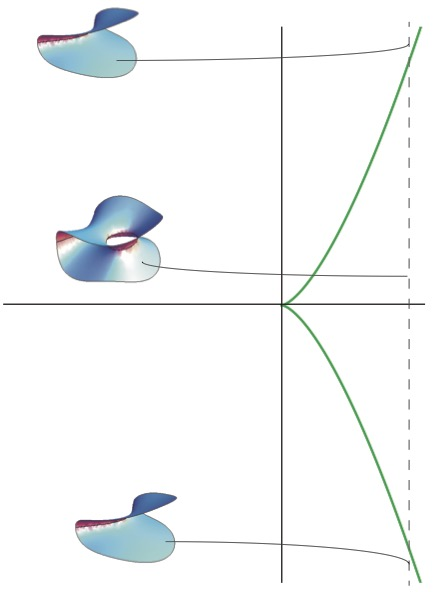


In [ ]:
from poisson.poisson import PoissonGeometry
pg4 = PoissonGeometry(4)

pi ={(1,2):'2*x3', (1,3): '2*x2', (2,3): '(3*x4 - 3*x1**2)'}
h = "x1 + x2 + x3 + x4"

pg4.hamiltonian_vf(pi, h)

{(1,): '-2*x2 - 2*x3',
 (2,): '3*x1**2 + 2*x3 - 3*x4',
 (3,): '-3*x1**2 + 2*x2 + 3*x4'}

The above result is translated into the following vector field: 

$$X_{f} = (-2x_{2} - 2x_{3})\frac{\partial}{\partial x_{1}} + (3x_{1}^{2} + 2x_{3} - 3x_{4})\frac{\partial}{\partial x_{2}} + (-3x_{1}^{2} + 2x_{2} + 3x_{4})\frac{\partial}{\partial x_{3}} $$

Consider the Poisson bivector defined near a uniparametric family of *creation* singularities (with respect to parameter $s$). 

$$\pi_s =  2x_{3}\frac{\partial}{\partial x_{1}}\wedge\frac{\partial}{\partial x_{2}} + 2x_{2} \frac{\partial}{\partial x_{1}}\wedge \frac{\partial}{\partial x_{3}} - 3(s-x_{4}^{2}+x_{1}^{2})\frac{\partial}{\partial x_{2}}\wedge \frac{\partial}{\partial x_{3}}$$

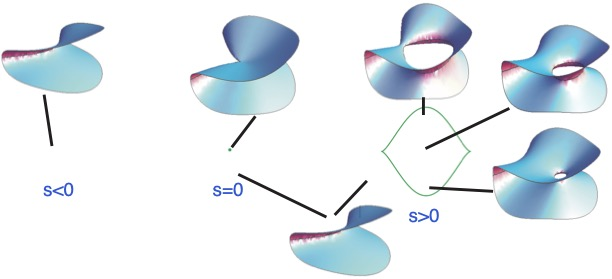

In [ ]:
from poisson.poisson import PoissonGeometry
pg4 = PoissonGeometry(4)

pi ={(1,2):'2*x3', (1,3): '2*x2', (2,3): '3*(s - x4**2 + x1**2)'}
h = "x1**2 + x2**2 + x3**2 + x4**2"

pg4.hamiltonian_vf(pi, h)

{(1,): '-8*x2*x3',
 (2,): '4*x1*x3 - 2*x3*(3*s + 3*x1**2 - 3*x4**2)',
 (3,): '4*x1*x2 - 2*x2*(-3*s - 3*x1**2 + 3*x4**2)'}

This translates to the following vector field:

$$ X_{f} = -8x_{2}x_{3}\frac{\partial}{\partial x_{1}} + [4x_{1}x_{3} - 2x_{3}(3s + 3x_{1}^{2} - 3x_{4}^{2})]\frac{\partial}{\partial x_{2}} + [4x_{1}x_{2} - 2x_{2}(-3s - 3x_{1}^{2} + 3x_{4}^{2})]\frac{\partial}{\partial x_{2}}$$


### Bott-Morse Foliations in 3D

Let us consider an example in dimension 3, for Poisson structures with a foliation with Bott-Morse type singularities (see [On Bott-Morse Foliations and their Poisson Structures in Dimension 3](http://www.journalofsing.org/volume19/evangelista-suarez-serrato-torres-orozco-vera.pdf)), M. Evangelista- Alvarado, J. Torres Orozco, P. Suárez-Serrato, R. Vera, Journal of Singularities, Volume 19 (2019), 19-33.  

Consider the bivector defined near a chair-type Bott-Morse sigularity and with Morse index equal to two.

$$\pi = -x_{3}\frac{\partial}{\partial x_{1}} \wedge \frac{\partial}{\partial x_{2}} + x_{2}\frac{\partial}{\partial x_{1}} \wedge \frac{\partial}{\partial x_{2}} + x_{1}\frac{\partial}{\partial x_{3}} \wedge \frac{\partial}{\partial x_{3}},$$

and the smooth function

$$h = x_{1} + x_{2} + x_{3},$$

to compute the Hamiltonian vector field $X_h$ associated to $h$.


In [ ]:
from poisson.poisson import PoissonGeometry
pg3 = PoissonGeometry(3, variable='x')

pi = {(1,2):'-x3', (1,3):'x2', (2, 3):'x1'}
h = "x1 + x2 + x3"

pg3.hamiltonian_vf(pi, h)

{(1,): '-x2 + x3', (2,): '-x1 - x3', (3,): 'x1 + x2'}

We obtain the Hamiltonian vector field

$$X_{h} = (-x_{2} + x_{3})\frac{\partial}{\partial x_{1}} - (x_{1} + x_{3})\frac{\partial}{\partial x_{2}} + (x_{1} + x_{2})\frac{\partial}{\partial x_{3}} $$

Now we evaluate it with a ranodm mesh $M$ to compute its visualization in 3D with `plotly`. 

In [ ]:
import numpy
from numpoisson.numpoisson import NumPoissonGeometry as npg
npg3 = npg(3, variable="x")
M = numpy.random.rand(10**4, 3)

X_h_eval = npg3.num_hamiltonian_vf(pi, h, M)
X_h_eval

array([[[-0.11992911],
        [-0.76866668],
        [ 0.88859579]],

       [[-0.64544239],
        [-0.34857775],
        [ 0.99402013]],

       [[-0.5746605 ],
        [-0.52031911],
        [ 1.09497961]],

       ...,

       [[ 0.14433755],
        [-1.40427637],
        [ 1.25993883]],

       [[-0.66118863],
        [-0.55181882],
        [ 1.21300745]],

       [[ 0.29494556],
        [-0.96974619],
        [ 0.67480063]]])

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Define the values for the x,y,z parts 
x, y, z = M[:,0], M[:,1], M[:,2]
u = numpy.array([i[0] for i in X_h_eval[:,0]])
v = numpy.array([i[0] for i in X_h_eval[:,1]])
w = numpy.array([i[0] for i in X_h_eval[:,2]])

fig = go.Figure(
    data=go.Cone(
      x = x.tolist(),
      y = y.tolist(),
      z = z.tolist(),
      u = u.tolist(),
      v = v.tolist(),
      w = w.tolist(),
      # Colors can be changed, see link 
      # https://plotly.com/python/builtin-colorscales/
      colorscale='GnBu',
      sizemode="absolute",
      sizeref=1, # tamaño de los conitos
      anchor="tip"
    )
)

fig.update_layout(
    # All available templates are here 
    # https://plotly.com/python/templates/
    template = "plotly_dark",
    title = "Gráfica del campo vectorial X_h_eval",
    height = 1000, # this is the pixel size (px)
)
fig.show()

Consider the smooth function

$$h_{0} = x_{1}x_{2}x_{3}.$$

Compute $X_{h_{0}}$ with

In [ ]:
h0 = "x1*x2*x3"
pg3.hamiltonian_vf(pi, h0)

{(1,): '-x1*x2**2 + x1*x3**2',
 (2,): '-x1**2*x2 - x2*x3**2',
 (3,): 'x1**2*x3 + x2**2*x3'}

We obtain the Hamiltonian vector field 

$$X_{h} = (-x_{1}x_{2}^{2} + x_{1}x_{3}^{2})\frac{\partial}{\partial x_{1}} - (x_{1}^{2}x_{2} + x_{2}x_{3}^{2})\frac{\partial}{\partial x_{2}} + (x_{1}^{2}x_{3} + x_{2}^{2}x_{3})\frac{\partial}{\partial x_{3}} $$


Evaluate the field on a mesh $M$ defined above, visualize with  `plotly` in 3D. 

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Define the values for the x,y,z parts 
X_h0_eval = npg3.num_hamiltonian_vf(pi, h0, M)
x, y, z = M[:,0], M[:,1], M[:,2]
u = numpy.array([i[0] for i in X_h0_eval[:,0]])
v = numpy.array([i[0] for i in X_h0_eval[:,1]])
w = numpy.array([i[0] for i in X_h0_eval[:,2]])

fig = go.Figure(
    data=go.Cone(
      x = x.tolist(),
      y = y.tolist(),
      z = z.tolist(),
      u = u.tolist(),
      v = v.tolist(),
      w = w.tolist(),
      # Colors can be changed, see link 
      # https://plotly.com/python/builtin-colorscales/
      colorscale='GnBu',
      sizemode="absolute",
      sizeref=3, # tamaño de los conitos
      anchor="tip"
    )
)

fig.update_layout(
    # All available templates are here  
    # https://plotly.com/python/templates/
    template = "plotly_dark",
    title = "Gráfica del campo vectorial X_h0_eval",
    height = 1000, # this is the pixel size (px)
)
fig.show()

Finally, let's verify that the bivector is unimodular by running

In [ ]:
pg3.is_unimodular_homogeneous(pi)

True

Calculate the unimodular field associated with $\pi$

In [ ]:
pg3.modular_vf(pi, 1)

{}

Therefore, in this case the modular field of $\pi$ with respect to the Euclidean volume form is trivial.
